## Observations and Insights

1 - According to the analysis the regimens that are most promising based on the measurements of central tendency of our summary are: Capomulin and Ramicane, both of them are also the regimens that have been used the most for experimentation, because they have a higher quantity of data points than all the others.

2 - Pearson coefficient is of 0.84 for mouse weight vs av.tumor size, this is showing a positive correlation between both variables, therefore in our sample while our mouse is heavier also his tumor could be bigger.

3 - Distribution between male and female are very similar in our sample 50/50.

4 - It was hard to choose 2 additional promising regimens besides Capomulin and Ramicane, there are 3 regimens that are very close to each other in measurements: Infubinol, Ceftamin and Propriva.

5 - There is only 1 promising regimen with outlier: Infubinol.

6 - Popriva may have more potential as a regimen, it has good indicators and its the regimen with less data points of all, perhaps its necessary to experiment with this regimen more thoroughly.

7 - Timepoints range from 0 to 45, its not specified the measure of time (days? weeks?) There are mouses that do not reach all the timepoints, is there an explanation for this? do they die before the last timepoint?.



## Dependencies and starter code

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

## Summary statistics

In [174]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
aggr_list = [np.mean, np.median, np.var, np.std, st.sem]
summary_table = pd.DataFrame(merged_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': aggr_list}))
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

Text(0.5, 1.0, 'Number of data points for each regimen')

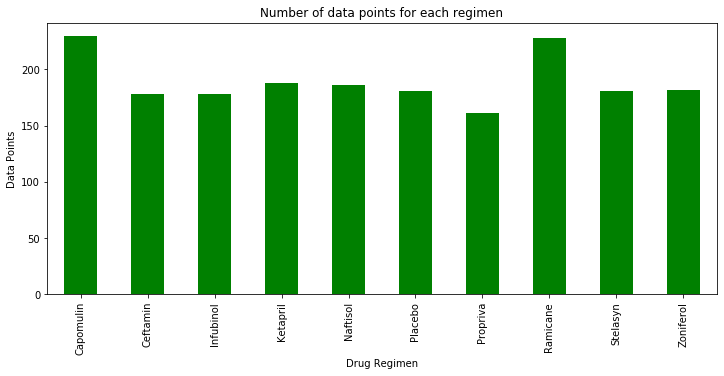

In [176]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
number_regimen_ds = merged_df.groupby("Drug Regimen").size()

graph = number_regimen_ds.plot(kind="bar", figsize=(12,5), color="g")
graph.set_ylabel("Data Points")

plt.title("Number of data points for each regimen")

Text(0, 0.5, 'Data points')

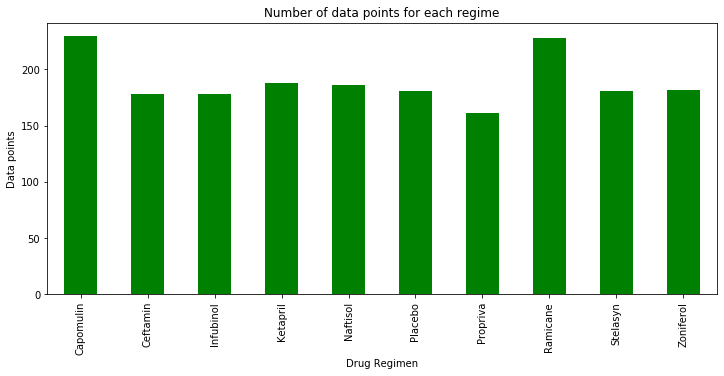

In [177]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(number_regimen_ds))
x_ticks = [value for value in x_axis]
plt.figure(figsize=(12,5))
plt.xticks(x_ticks, number_regimen_ds.index, rotation="vertical")
plt.bar(x_axis,number_regimen_ds, width=0.5, color="g")
plt.xlim(-0.5,len(x_axis) -0.5)

plt.title("Number of data points for each regime")
plt.xlabel("Drug Regimen")
plt.ylabel("Data points")

## Pie plots

Text(0, 0.5, '')

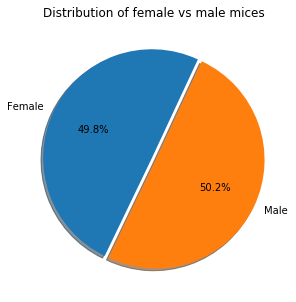

In [178]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_dist = merged_df.groupby("Sex")["Mouse ID"].nunique()

graph = mouse_dist.plot(kind="pie", figsize=(5,5), autopct='%1.1f%%', explode = [0.02,0.02], startangle=65, shadow=True)
plt.title("Distribution of female vs male mices")
plt.ylabel("")

Text(0.5, 1.0, 'Distribution of female vs male mices')

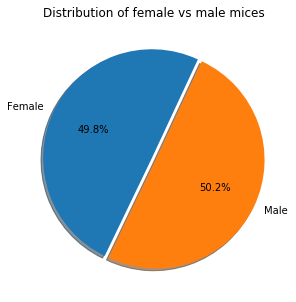

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(mouse_dist, labels = mouse_dist.index, autopct='%1.1f%%', explode = [0.02,0.02], startangle=65, shadow=True)
plt.title("Distribution of female vs male mices")

## Quartiles, outliers and boxplots

In [180]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_timepoint = merged_df.groupby("Mouse ID")["Timepoint"].max()
final_volume_df = pd.merge(merged_df, max_timepoint, on=["Mouse ID","Timepoint"])

# most promising regimens accordings to the summary are Capomulin, Ramicane and Ceftamin, however for the 4th regimen
# its actually hard to choose, there are 2 main contenders:Infubinol and Propriva because both shows very similar values, even the difference in SEM is small
# We could take any of both or just get the one with lower SEM, however another approach that may provide more insight is to rank all regimens 
# by the average size of the tumor on the last time point of treatment.
final_size_tumors_ds = final_volume_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
final_size_tumors_ds.sort_values()

Drug Regimen
Ramicane     36.191390
Capomulin    36.667568
Propriva     56.736964
Ceftamin     57.753977
Infubinol    58.178246
Zoniferol    59.181258
Placebo      60.508414
Stelasyn     61.001707
Naftisol     61.205757
Ketapril     62.806191
Name: Tumor Volume (mm3), dtype: float64

In [181]:
final_volume_df = final_volume_df.loc[final_volume_df["Drug Regimen"].isin(['Ramicane','Capomulin','Propriva','Ceftamin','Infubinol'])]

def getSeries(regimen):
    return final_volume_df.loc[final_volume_df["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]

def getOutliers(regimen):
    qrt = getSeries(regimen).quantile([0.25,0.5,0.75])
    lq = qrt[0.25]
    uq = qrt[0.75]
    iqr = uq-lq
    lb = lq - (1.5*iqr)
    ub= uq + (1.5*iqr)
    return f"{regimen} Outliers may be values below {lb} and above {ub} \n"


result = getOutliers("Capomulin") + getOutliers("Ramicane") + getOutliers("Propriva") + getOutliers("Ceftamin") + getOutliers("Infubinol")


print(result)

Capomulin Outliers may be values below 20.70456164999999 and above 51.83201549 
Ramicane Outliers may be values below 17.912664470000003 and above 54.30681135 
Propriva Outliers may be values below 28.95110303500001 and above 82.742745555 
Ceftamin Outliers may be values below 25.355449580000002 and above 87.66645829999999 
Infubinol Outliers may be values below 36.83290494999999 and above 82.74144559000001 



Text(0.5, 0, 'Drug Regimen')

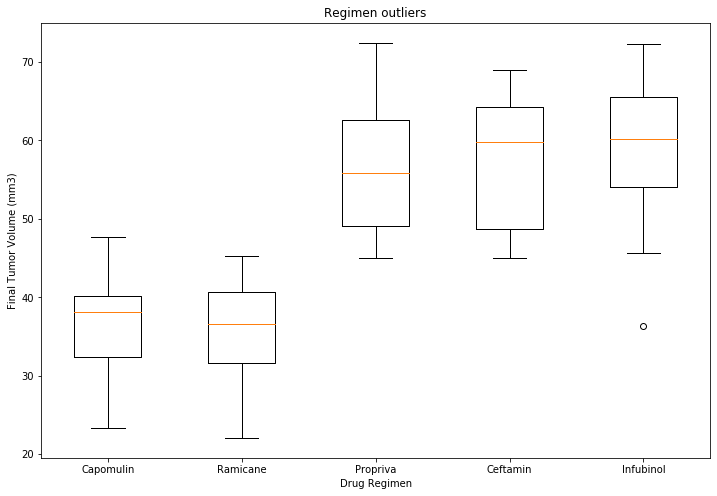

In [168]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = getSeries("Capomulin")
ramicane = getSeries("Ramicane")
propriva = getSeries("Propriva")
ceftamin = getSeries("Ceftamin")
infubinol = getSeries("Infubinol")

plt.figure(figsize=(12,8))
plt.boxplot([capomulin,ramicane,propriva,ceftamin,infubinol], labels=["Capomulin","Ramicane","Propriva","Ceftamin","Infubinol",])
plt.title('Regimen outliers')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

## Line and scatter plots

Text(0, 0.5, 'Tumor volume')

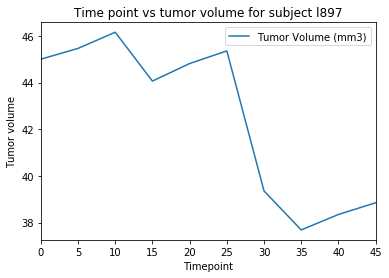

In [182]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_ds = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
mouses = capomulin_ds["Mouse ID"].unique()
random_idx = np.random.randint(0, len(mouses))
mouse_id = mouses[random_idx]
mouse_ds = capomulin_ds.loc[capomulin_ds["Mouse ID"] == mouse_id]

mouse_ds.plot(kind="line",x="Timepoint", y="Tumor Volume (mm3)")
plt.title(f"Time point vs tumor volume for subject {mouse_id}")
plt.ylabel("Tumor volume")

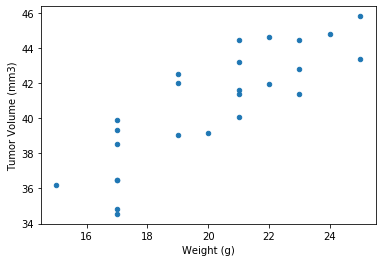

In [183]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_av_df = capomulin_ds.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
tumor_av_df = tumor_av_df.reset_index()
tumor_av_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

The correlation between Weight and av. tumor size is 0.84
The r-squared is: 0.7088568047708717


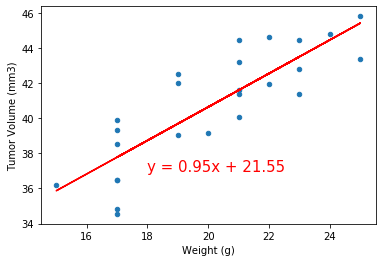

In [184]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
cor = st.pearsonr(tumor_av_df["Weight (g)"],tumor_av_df["Tumor Volume (mm3)"])
print(f"The correlation between Weight and av. tumor size is {round(cor[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_av_df["Weight (g)"],tumor_av_df["Tumor Volume (mm3)"])
rgrs_values = tumor_av_df["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
tumor_av_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

plt.plot(tumor_av_df["Weight (g)"],rgrs_values,"r-")
plt.annotate(line_eq,(18,37),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()